In [33]:
import pandas as pd

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab 1 - CDP/spotify_data/train.csv")
train

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,0ognkBvJqaov2gWDgaMzvz,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49
129168,2B8TnS5nJijlzuORGs3RKy,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34
129169,5n5uyFpfopa4mNdSN0gTaH,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65
129170,0MrZG1nTNQVzeSJKi6gFVF,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55


## Questão 1

#### Medir a correlação entre as variáveis preditores entre si, e depois entre as variáveis preditoras e a variável alvo (popularity)

In [4]:
train.corr(method='pearson')

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
year,1.000000,-0.611132,0.156638,0.106933,0.544637,0.152977,-0.125687,0.017806,-0.010639,0.468752,-0.050084,-0.218426,0.160837,-0.049031,0.540793
acousticness,-0.611132,1.000000,-0.263446,-0.087591,-0.749734,-0.207869,0.224215,-0.026692,-0.030267,-0.542569,0.065685,-0.022603,-0.219324,-0.166737,-0.408206
danceability,0.156638,-0.263446,1.000000,-0.101574,0.207147,0.201365,-0.219149,0.025205,-0.109306,0.251570,-0.046713,0.241415,0.002451,0.540562,0.129657
duration_ms,0.106933,-0.087591,-0.101574,1.000000,0.059383,-0.034832,0.103110,0.000535,0.031833,0.021038,-0.046835,-0.097496,-0.008338,-0.184650,0.024787
energy,0.544637,-0.749734,0.207147,0.059383,1.000000,0.102161,-0.179581,0.035897,0.133413,0.777683,-0.057799,-0.114252,0.262917,0.328542,0.340235
explicit,0.152977,-0.207869,0.201365,-0.034832,0.102161,1.000000,-0.129241,0.006451,0.038892,0.105336,-0.065999,0.356334,0.004790,-0.009063,0.153227
instrumentalness,-0.125687,0.224215,-0.219149,0.103110,-0.179581,-0.129241,1.000000,-0.004247,-0.045743,-0.318725,-0.056320,-0.133433,-0.065616,-0.214663,-0.298157
key,0.017806,-0.026692,0.025205,0.000535,0.035897,0.006451,-0.004247,1.000000,-0.004951,0.024940,-0.126280,0.012874,0.005985,0.026535,0.000432
liveness,-0.010639,-0.030267,-0.109306,0.031833,0.133413,0.038892,-0.045743,-0.004951,1.000000,0.059482,0.000512,0.122887,0.008360,-0.005164,-0.082833
loudness,0.468752,-0.542569,0.251570,0.021038,0.777683,0.105336,-0.318725,0.024940,0.059482,1.000000,-0.020529,-0.215056,0.213296,0.302691,0.346347


### Resposta:



1.   year

> não possui correlação forte com ninguém além dele mesmo

>  possui correlação negativa moderada com acousticness, e positiva moderada com energy e loudness.

> possui correlação positiva fraca com danceability, duration_ms, explicit, key e tempo, e possui correlação negativa fraca com o restante das variáveis preditoras 

> correlação moderada positiva com a variável alvo popularity

> O ano em que a musica foi lançada não aparenta impactar muito na popularidade.

2.   acousticness

> possui correlação negativa forte com energy, nenhuma correlação positiva forte além dele mesmo.

> possui correlação negativa moderada com loudness, e positiva moderada com nenhuma.

> possui correlação positiva fraca com instrumentalness e mode, e negativa fraca com o restante (exceto o alvo)

> Possui correlação negativa moderada com popularity

> Músicas acústicas aparentam ser menos energéticas e menos "barulhentas", e aparentam ser menos populares também

3. danceability

> Não há nenhuma correlação forte, exceto com ela mesma

> Correlação positiva moderada com valence, e moderada nengativa com nenhuma

> Fracamente correlacionada a todas as outras variáveis

> Correlação positiva fraca com popularidade

> As músicas mais "dançantes" aparentam são mais alegres, dado a correlação positiva moderada com valence. E que músicas populares não necessariamente são dançantes.

4. duration_ms

> Todas as correlações são fracas, inclusive com a variável alvo popularity.

> Músicas mais longas ou mais curtas não tem muito a ver com popularidade.

5. energy

> correlação positiva forte com loudness, e não há negativa forte.

> Todas as outras correlações são fracas

> Músicas mais energeticas estatisticamente são mais "barulhentas", e isso não aparenta impactar muito na popularidade

6. explicit

> Todas as correlações são fracas

> músicas com conteúdo explicito não aparentam impactar muito na popularidade ou em variável nenhuma.

7. instrumentalness

> Todas as correlações são fracas

> músicas com mais instrumental não aparentam impactar muito em nenhuma variável e nem na popularidade

8. key

> Todas as correlação são muito fracas

> Essa variável não aparenta impactar em nada

9. liveness

> Todas as correlação são muito fracas

> Essa variável não aparenta impactar em nada

10. loudness

> Além das variáveis que já foram mencionadas anteriormente, nenhuma correlação forte

> A correlação de loudness com popularity é razoavelmente fraca

> Loudness nao aparenta impactar muito na popularidade

11. mode 

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

12. speechiness

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

13. tempo

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

14. valence

> Todas as correlação são fracas, exceto danceability que é positiva e moderada como ja mencionado

> Essa variável não aparenta impactar na popularidade, e músicas mais alegres aparentam serem mais dançantes como ja dito.

15. popularity

> Tudo sobre popularidade já foi falado anteriormente.

### Verificando se há valores ausentes

In [5]:
train.isnull().values.any()

False

Não há valores ausentes

## Questão 2

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt

In [7]:
X, Y = train["year"].values.reshape(-1, 1), train["popularity"].values.reshape(-1, 1)
model = LinearRegression()

In [8]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([[0.44272144]])

In [10]:
model.intercept_

array([-849.15870207])

In [11]:
y_pred = model.predict(X)

In [12]:
rmse = mean_squared_error(Y, y_pred, squared=False)
rmse

18.401374068089872

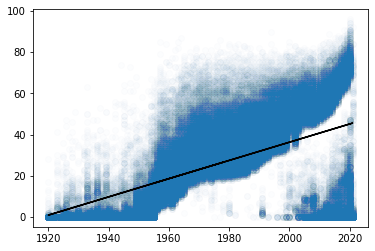

In [13]:
plt.scatter(X, Y, alpha=0.01)
plt.plot(X, model.predict(X),color='k')
plt.show()

### Resposta:

Intercept:
> O Intercept é, arredondando, -849. Disso, deduzimos que uma música muito antiga não seria muito popular, aparentemente.

Coeficiente:
> O coeficiente foi de 0.44, quer dizer que quanto mais recente for a música a tendência é que seja mais popular.

Erro:
> O RMSE é igual a 18, quer dizer que esse modelo erra a predição em média por 18 pontos de popularidade. Esse erro é muito alto, significa que o modelo não está adequado.

Justificativa para a escolha da variável:
> A variável year teve a maior correlação com a variável popularity, em módulo.

## Questão 3

In [14]:
X = train[["year", "acousticness", "energy"]].values.reshape(-1, 3)
Y = train["popularity"].values.reshape(-1, 1)
model = LinearRegression()

In [15]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = model.predict(X)

In [17]:
rmse = mean_squared_error(Y, y_pred, squared=False)
rmse

18.274492565676198

In [18]:
model.coef_

array([[ 0.38225948, -7.6996085 , -1.13565974]])

["year", "acousticness", "energy"]

In [19]:
model.intercept_

array([-725.23963037])

### Resposta

Intercept:
> O intercept está bem maior que o valor anterior. Com muitas variáveis a interpretação fica confusa.

Coeficiente:
> Year tem o menor peso na predição de popularidade. Accousticness tem o maior peso. Analisando somente esses coeficientes pode-se interpretar que músicas mais recentes, com pouca acústica e com menos energia são mais populares. 

Erro:
> O erro agora está um pouco menor que o erro anterior, mas ainda não é bom.

## Questão 4
Usar validação cruzada


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
x_columns = ["year","acousticness","danceability","duration_ms","energy","explicit","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = train[x_columns]
Y = train['popularity']

In [84]:
X = scaler.fit_transform(X)

#### Funções..

Calcula RMSE com CV.

In [23]:
# Calcula o RMSE usando cross_validation
from sklearn.model_selection import cross_val_score
def rmse_cv(model, X,Y):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

In [25]:
def polynomial_ridge_regression(X,Y, deg, l2_penalty):
    scaler = StandardScaler()
    model = make_pipeline(PolynomialFeatures(deg),scaler,Ridge(alpha=l2_penalty)) 
    model.fit(X,Y)
    return model

In [26]:
def print_coefficients(model):    
    # Retorna o grau do polinômio
    deg = len(model.steps[2][1].coef_)-1
    # Obtém os parâmetros estimados
    w = list(model.steps[2][1].coef_) #model.steps é usado pois o modelo é calculado usando make_pipile do scikit learn
    # Numpy tem uma função para imprimir o polinômio mas os parâmetros precisam estar na ordem inversa
    print ('Polinômio estimado para grau ' + str(deg) + ':')
    w.reverse()
    print (np.poly1d(w)+model.steps[2][1].intercept_)

In [27]:
def print_poly_predictions(X,Y, model):
    plot_data(X,Y)
    x_plot = np.array([i/200.0 for i in range(200)])
    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X_plot)
    plt.plot(x_plot,y_pred,'g-')
    plt.axis([0,1,-1.5,2])

In [28]:
def plot_data(X,Y):    
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0,1,-1.5,2])

### Regressão Ridge

Text(0, 0.5, 'rmse')

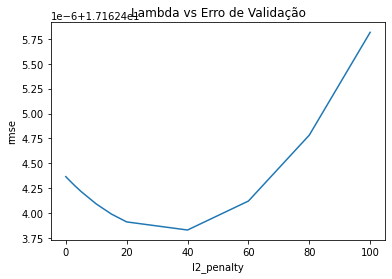

In [29]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty), X,Y).mean() 
            for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
cv_ridge.plot(title="Lambda vs Erro de Validação")
plt.xlabel("l2_penalty")
plt.ylabel("rmse")

In [30]:
best_l2_penalty= l2_penalties[cv_ridge.argmin()]
best_rmse = cv_ridge.min()
print (best_l2_penalty, best_rmse)

40 17.16240383011121


### Lasso

Text(0, 0.5, 'rmse')

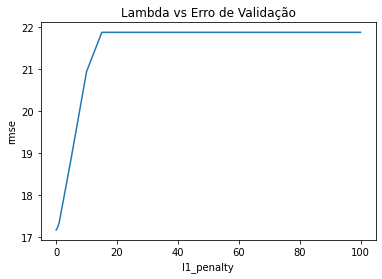

In [31]:
l1_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_lasso = [rmse_cv(Lasso(alpha=l1_penalty), X,Y).mean() 
            for l1_penalty in l1_penalties]
cv_lasso = pd.Series(cv_lasso,index=l1_penalties)
cv_lasso.plot(title="Lambda vs Erro de Validação")
plt.xlabel("l1_penalty")
plt.ylabel("rmse")

In [32]:
best_l1_penalty= l1_penalties[cv_lasso.argmin()]
best_rmse = cv_lasso.min()
print (best_l1_penalty, best_rmse)

0.001 17.162405837866814


### MLPRegressor


In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
# Reescrever RMSE
from sklearn.model_selection import cross_val_score
def rmse_cv(model, X,Y):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=4))   # mudar numero do cv
    return (rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'rmse')

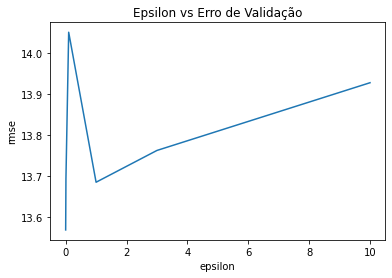

In [36]:
epsilon = [0.001, 0.01, 0.1, 1, 3, 10]

cv_ = [rmse_cv(MLPRegressor(hidden_layer_sizes=(5,5) ,max_iter=200, epsilon=e), X,Y).mean() 
            for e in epsilon]
cv_ = pd.Series(cv_,index=epsilon)
cv_.plot(title="Epsilon vs Erro de Validação")
plt.xlabel("epsilon")
plt.ylabel("rmse")

In [38]:
best_epsilon= epsilon[cv_.argmin()]
best_rmse = cv_.min()
print (best_epsilon, best_rmse)

0.001 13.567603546104854


#### Resposta

> O modelo de regressão Ridge e o Lasso obtiveram praticamente o mesmo RMSE, a diferença é muito pequena. Arredondando, os dois tiveram RMSE = 17,16

> O modelo de regressão MLP obteve o melhor resultado, que foi RMSE = 13,56. Ele demorou demais pra rodar então tive que ajustar a função rmse_cv para usar menos cv que a função utilizada para ridge e lasso.

## Questão 5

Quais as variáveis mais importantes segundo o modelo de regressão Ridge e Lasso?  Variáveis foram descartadas pelo Lasso? Quais?

#### Ridge

In [43]:
model_ridge = Ridge(alpha=best_l2_penalty)

In [44]:
model_ridge.fit(X,Y)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [45]:
y_pred = model_ridge.predict(X)

In [61]:
j = 0
for i in model_ridge.coef_:
    print (i, ": ", x_columns[j])
    j += 1

9.115756054657362 :  year
-2.7049377476374348 :  acousticness
-0.4878118169080608 :  danceability
-0.16089501290346495 :  duration_ms
-0.9719870985964159 :  energy
2.4088919841183647 :  explicit
-5.133055203387511 :  instrumentalness
-0.1593466165949924 :  key
-1.551870395053928 :  liveness
-0.17212195532622931 :  loudness
0.2891733941968296 :  mode
-3.8622850844112766 :  speechiness
-0.25505428601730296 :  tempo
1.0787993756155885 :  valence


### Resposta Ridge:

> As variáveis de maior peso foram: year, acousticness, explicit, instrumentalness e speechiness

> Considerei os coeficientes de módulo maior ou igual a 2, pois a maioria eram números decimais.

#### Lasso

In [51]:
model_lasso = Lasso(alpha=best_l1_penalty)

In [52]:
model_lasso.fit(X,Y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
len(model_lasso.coef_)

14

In [56]:
len(x_columns)

14

In [62]:
j = 0
for i in model_ridge.coef_:
    print (i, ": ", x_columns[j])
    j += 1

9.115756054657362 :  year
-2.7049377476374348 :  acousticness
-0.4878118169080608 :  danceability
-0.16089501290346495 :  duration_ms
-0.9719870985964159 :  energy
2.4088919841183647 :  explicit
-5.133055203387511 :  instrumentalness
-0.1593466165949924 :  key
-1.551870395053928 :  liveness
-0.17212195532622931 :  loudness
0.2891733941968296 :  mode
-3.8622850844112766 :  speechiness
-0.25505428601730296 :  tempo
1.0787993756155885 :  valence


### Resposta:

> Os coeficientes de maior peso foram os mesmos da regressão Ridge. Lembrando, que ambas obtiveram resultados muito similares na questão anterior usando validação cruzada.

> A regressão Lasso não zerou qualquer coeficiente.

## Questão 6

Re-treine o melhor modelo (usando os melhores valores de parâmetros encontrados em todos os dados, sem usar validação cruzada). Use esse último modelo treinado para prever os dados de teste disponíveis no challenge que criamos na plataforma Kaggle

In [85]:
# O melhor modelo foi o MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(5,5), max_iter=200, epsilon=best_epsilon)

In [86]:
modelo.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=0.001,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [87]:
teste_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab 1 - CDP/spotify_data/test.csv")
teste = teste_df[x_columns]
teste

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,0.0314,87.967,0.4340
1,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,0.0291,108.348,0.3460
2,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,0.0352,158.734,0.4230
3,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,0.0401,127.783,0.6950
4,1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,0.2660,92.003,0.8560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,0.0547,142.289,0.3780
43054,1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,0.0344,97.683,0.0371
43055,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,0.0376,44.068,0.1730
43056,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,0.0503,92.456,0.3500


In [88]:
teste = scaler.transform(teste)
teste

array([[ 0.72674266,  0.05025283,  0.75040973, ..., -0.40722169,
        -0.9547897 , -0.34474055],
       [-0.28364926, -0.71738174, -0.38723294, ..., -0.41979846,
        -0.28321787, -0.67750715],
       [ 0.27767958, -1.21199164, -1.25752958, ..., -0.38644269,
         1.37704503, -0.38633638],
       ...,
       [ 0.53963304,  0.8442666 , -1.74671593, ..., -0.37331911,
        -2.40130026, -1.33169603],
       [ 1.55002496, -1.05767335,  0.54563405, ..., -0.3038735 ,
        -0.80687322, -0.6623814 ],
       [ 1.55002496,  0.79942197,  0.68783938, ..., -0.41870483,
        -0.22868417, -1.55101946]])

In [89]:
Y_pred = modelo.predict(teste)

In [90]:
Y_pred

array([48.22857211, 28.11967974, 37.57886469, ..., 40.02256494,
       30.92607656, 40.59131834])

In [91]:
map_ = {"id": teste_df["id"], "popularity": Y_pred}
df_submission = pd.DataFrame(data = map_)
df_submission

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,48.228572
1,17TO3XH1slhDyqnwypne06,28.119680
2,5chxjST0MfWZPsaHrWgiqe,37.578865
3,4Db6PxFIiK1a6nCEJABTHk,40.247436
4,3MPKTMJIxlORqcxw542HHK,44.041091
...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,14.309734
43054,3gh5bl5nBDN6ubcbxltKdr,5.526044
43055,6gVkG8f7ldsQs0jAI8cB4X,40.022565
43056,6n6OQfBpCgzF9oEg8zhBN7,30.926077


In [93]:
df_submission.to_csv("/content/drive/MyDrive/Colab Notebooks/Lab 1 - CDP/spotify_data/df_submission.csv", index=False, header=True)